In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 

In [3]:
img = cv2.imread('./test _images/002_6e289116.jpg')
img.shape

(474, 474, 3)

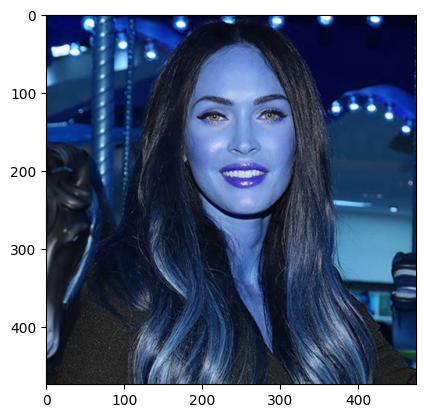

In [4]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # It removes the 3rd element in the array which is the rgb colors
gray.shape

(474, 474)

In [8]:
gray

array([[33, 33, 33, ..., 11, 23, 23],
       [33, 33, 33, ..., 12, 22, 22],
       [33, 33, 33, ..., 11, 17, 17],
       ...,
       [28, 32, 27, ..., 32, 42, 42],
       [69, 24, 22, ..., 32, 37, 68],
       [69, 24, 22, ..., 32, 37, 68]], shape=(474, 474), dtype=uint8)

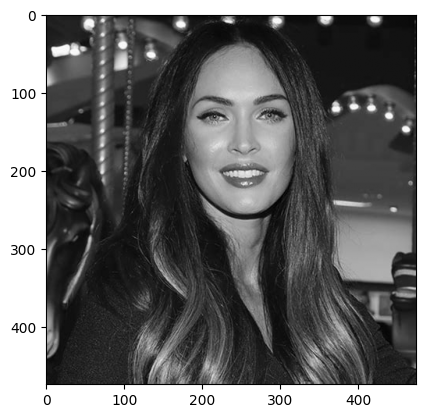

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('./open_cv/haracascade_frontalface_default.xml.txt')
eye_cascade = cv2.CascadeClassifier('./open_cv/haracascade_eye.xml.txt')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces 

array([[161,  62, 181, 181]], dtype=int32)

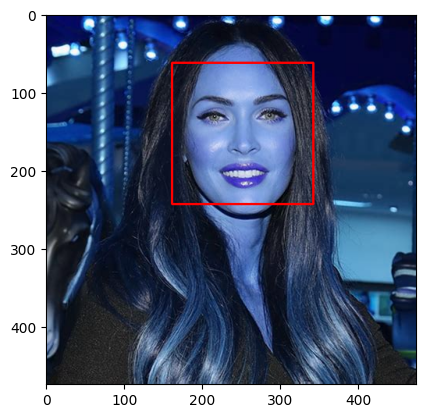

In [25]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

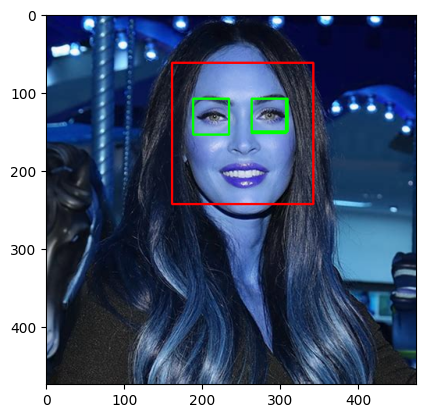

In [28]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ey,ew+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


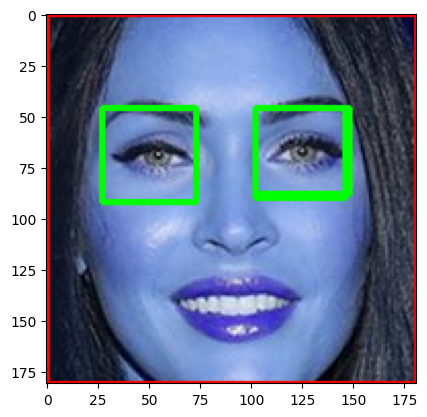

In [29]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi: region of interest